In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [2]:
df=pd.read_csv(r'C:\Users\agr20\Downloads\Handwritten digit recognizer\stock_predict\Aditya_Birla.csv')
df.head(0)

,Date,Open,High,Low,Close,Volume


In [3]:
training = df.iloc[:300, 1:2].values
testing = df.iloc[300:, 1:2].values

In [4]:
sc = MinMaxScaler(feature_range = (0, 1))
training_scaled = sc.fit_transform(training)

In [5]:
x_train = []
y_train = []
for iter in range(1, 300):
    x_train.append(training_scaled[iter-1:iter, 0])
    y_train.append(training_scaled[iter, 0])
x_train, y_train=np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [6]:
algo = Sequential()
algo.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50, return_sequences = True))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50, return_sequences = True))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50))
algo.add(Dropout(0.2))
algo.add(Dense(units = 1))
algo.compile(optimizer = 'adam', loss = 'mean_squared_error')
algo.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
10/10 [==============================] - 17s 18ms/step - loss: 0.2492
Epoch 2/100
10/10 [==============================] - 0s 17ms/step - loss: 0.2149
Epoch 3/100
10/10 [==============================] - 0s 16ms/step - loss: 0.1661
Epoch 4/100
10/10 [==============================] - 0s 18ms/step - loss: 0.1021
Epoch 5/100
10/10 [==============================] - 0s 16ms/step - loss: 0.0514
Epoch 6/100
10/10 [==============================] - 0s 19ms/step - loss: 0.0528
Epoch 7/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0436
Epoch 8/100
10/10 [==============================] - 0s 20ms/step - loss: 0.0353
Epoch 9/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0281
Epoch 10/100
10/10 [==============================] - 0s 17ms/step - loss: 0.0209
Epoch 11/100
10/10 [==============================] - 0s 19ms/step - loss: 0.0139
Epoch 12/100
10/10 [==============================] - 0s 21ms/step - loss: 0.0121
Epoch 13/100
10/10 [====

In [7]:
data_train = df.iloc[:300, 1:2]
data_test = df.iloc[300:, 1:2]
data_total = pd.concat((data_train, data_test), axis = 0)
total_input = data_total[len(data_total) - len(data_test) - 1:].values
total_input = total_input.reshape(-1,1)
total_input = sc.transform(total_input)
x_test = []
for iter in range(1, 71):
    x_test.append(total_input[iter-1:iter, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)

(70, 1, 1)


In [8]:
predicted_price = algo.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)

3/3 [==============================] - 4s 4ms/step


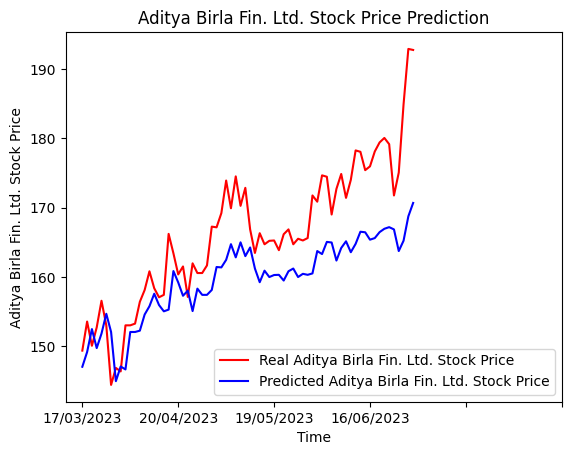

In [9]:
plt.plot(df.loc[300:, 'Date'],data_test.values, color = 'red', label = 'Real Aditya Birla Fin. Ltd. Stock Price')
plt.plot(df.loc[300:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Aditya Birla Fin. Ltd. Stock Price')
plt.xticks(np.arange(0,109,20))
plt.title('Aditya Birla Fin. Ltd. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Aditya Birla Fin. Ltd. Stock Price')
plt.legend()
plt.show()